### Linear Regression
This file contains the code for a Linear Regression ML algorithm implemented in Pytorch. The goal of the model is to calculate a best line of fit for a given set of points linking an independent variable with a dependent variable. From there, we can use the model to predict the value of the dependent variable given the indepdent value, and vice-versa.

In [56]:
# Imports
import torch
import torch.nn as nn

import numpy as np
import random
import time

import matplotlib.pyplot as plt

In [4]:
# Setting torch to use GPU acceleration if possible.
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")

torch.set_default_device(device)
print(f"Using device: {torch.get_default_device()}")

Using device: cpu


In [5]:
# ====================== DATA COLLECTION ======================

In [29]:
# Generate dummy data using numpy. The data here is guaranteed to have some correlation.
DATA_COUNT = 100
X_SCALE = 100
Y_SCALE = 20
CORRELATION_SCALE = 5

X = np.random.rand(DATA_COUNT, 1) * X_SCALE
Y = CORRELATION_SCALE * X + np.random.randn(DATA_COUNT, 1) * Y_SCALE

In [7]:
"""
To implement later - We will also implement actual data collection to attach this model to a
more realistic example.
"""

'\nTo implement later - We will also implement actual data collection to attach this model to a\nmore realistic example.\n'

In [37]:
# Create the train and test splits.
TRAIN_SPLIT = 0.8

splitIndex = int(DATA_COUNT * TRAIN_SPLIT)

trainX = X[:splitIndex]
trainY = Y[:splitIndex]

testX = X[splitIndex:]
testY = Y[splitIndex:]

In [16]:
# ====================== MODEL CONSTRUCTION ======================

In [95]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        y = self.linear(x)
        return y

    def predict(self, x):
        y = self.linear(torch.from_numpy(x).float)
        return y.item()

In [ ]:
# Train an agent.
LEARNING_RATE = 1e-3
EPOCHS = 10000
BATCH_SIZE = 64
REPORT_INTERVAL = 100

agent = LinearRegressionModel()

allLosses = []
agent.train()

lossFN = nn.MSELoss()
optimizer = torch.optim.SGD(agent.parameters(), lr = LEARNING_RATE)

for epoch in range(1, EPOCHS + 1):
    currentLoss = 0
    
    agent.zero_grad() # Reset Gradients.

    # Create batches.
    batches = list(range(len(trainX)))
    random.shuffle(batches)
    batches = np.array_split(batches, len(batches) // BATCH_SIZE)

    # Run through the batches.
    for i, batch in enumerate(batches):
        batchLoss = 0

        for index in batch:
            x = trainX[index]
            y = trainY[index]

            output = agent(torch.from_numpy(x).float())
            loss = lossFN(output, torch.from_numpy(y).float())
            batchLoss += loss

        # Batch complete. Optimise parameters.
        batchLoss.backward()
        nn.utils.clip_grad_norm_(agent.parameters(), 3)
        optimizer.step()
        optimizer.zero_grad()
        currentLoss += batchLoss.item() / len(batch)

    allLosses.append(currentLoss)

    if epoch % REPORT_INTERVAL == 0:
        print(f"Epoch #{epoch}: Average batch loss - {allLosses[-1]}")

In [54]:
# ====================== Model Evaluation ======================

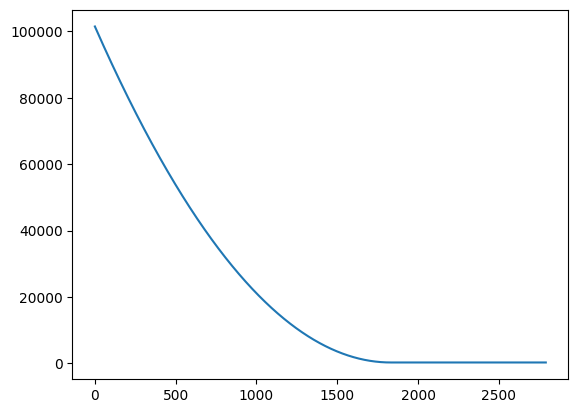

In [97]:
# Plotting the loss of the model.
plt.figure()
plt.plot(allLosses)
plt.show()

In [98]:
# Testing the model.
totalLoss = 0.0

for idx in range(len(testX)):
    x = testX[idx]
    y = testY[idx]

    output = agent(torch.from_numpy(x).float())
    totalLoss += abs((output - torch.from_numpy(y).float()).item())

averageLoss = totalLoss / len(testX)
print(f"Average Loss: {averageLoss}")

Average Loss: 14.977703475952149


In [99]:
# Calculating all of the predicted Y values.
predictedY = []

for x in X:
    output = agent(torch.from_numpy(x).float())
    predictedY.append(output.item())

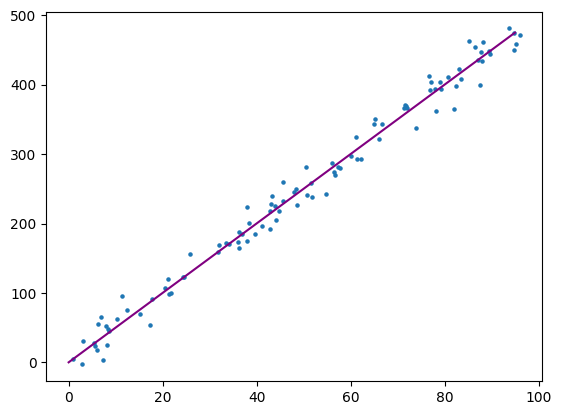

In [100]:
# ...And then using all of those values to plot the line of best fit.
plt.scatter(X, np.array(Y), s=5)

slope, intercept = np.polyfit(X[:, 0], np.array(predictedY), 1)
plt.plot(np.arange(X.max()), slope * np.arange(X.max()) + intercept, color="purple")

In [110]:
# Example Prediciton - Extrapolation
for delta in []:
    agent(torch.from_numpy(np.array([X.max() + delta])).float()).item()

729.4544677734375